In [56]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [57]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())


In [58]:
total_data = len(train_dataset)
batch_size = 100
iterations = 3000

In [59]:
epochs = int( iterations * batch_size / total_data)

In [60]:
epochs

5

In [61]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [62]:
## Check Iterability
import collections
isinstance(train_loader, collections.Iterable)

True

In [63]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [64]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return (out)

In [65]:
input_dimension = 28 * 28
output_dimension = 10


In [66]:
model = LogisticRegressionModel(input_dimension, output_dimension)

In [67]:
criterion = nn.CrossEntropyLoss()

In [68]:
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [69]:
print(list(model.parameters())[0].size()) ## Weights
print(list(model.parameters())[1].size()) ## Bias

torch.Size([10, 784])
torch.Size([10])


In [70]:
print(list(model.parameters())[0])

Parameter containing:
tensor([[ 0.0290, -0.0145,  0.0074,  ..., -0.0254, -0.0072,  0.0350],
        [-0.0334,  0.0294, -0.0239,  ..., -0.0222,  0.0162, -0.0027],
        [-0.0271, -0.0269, -0.0270,  ...,  0.0310,  0.0156, -0.0238],
        ...,
        [ 0.0129, -0.0349,  0.0214,  ..., -0.0052, -0.0213, -0.0335],
        [-0.0275,  0.0312,  0.0304,  ..., -0.0119,  0.0065, -0.0204],
        [ 0.0341,  0.0000,  0.0315,  ..., -0.0221,  0.0355,  0.0032]],
       requires_grad=True)


In [71]:
batch_size = 100
iterations = 3000
epochs = int (iterations * batch_size / len(train_dataset))

In [72]:
epochs

5

In [73]:
iter = 0
accuracy_list =[]
loss_list = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)
        
        optimizer.zero_grad()
        
        output = model(images)
        
        loss = criterion(output, labels)
        
        loss.backward()
        
        optimizer.step()
        
        iter += 1
        loss_list.append(loss)
        
        if i % 500 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                
                images = Variable(images.view(-1, 28 * 28))
                labels = Variable(labels)
                output = model(images)
                _ , predicted = torch.max(output.data, 1)
                total += labels.size(0)
                correct +=(predicted == labels).sum()
                accuracy = 100 * correct / total
                accuracy_list.append(accuracy)

In [74]:
import matplotlib.pyplot as plt


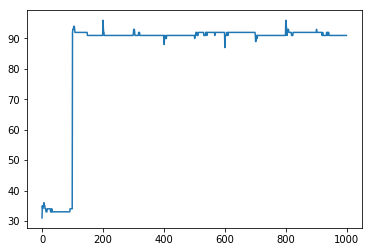

In [75]:
plt.plot(accuracy_list)


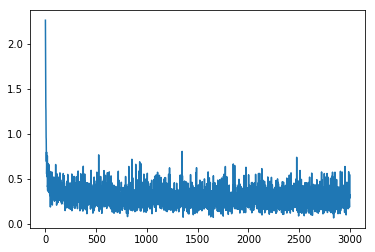

In [76]:
plt.plot(loss_list)